In [1]:
#load the bloody mess
#first, import everything but the kitchen sink
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True # Comment this line if no LaTeX installation is available
matplotlib.rcParams['font.family'] = 'serif' # Comment this line if no LaTeX installation is available
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'
import matplotlib.pyplot as plt
import sys
import os
import torch; torch.set_default_dtype(torch.float64)
import math
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, 'C:\\Users\\vascodebruijn\\Documents\\GitHub\\graph-neural-networks')

if module_path not in sys.path:
    sys.path.append(module_path+"\\Python")
import utils
import import_traces
import graph_generation as gg

#Some variables
K= np.array([1,2,3,4,5])
L =np.array( [1,2,3,4])
F = np.array([1,2,4,8,16,32,64,128])

Faxis = (1,2)
Laxis = (0,2)
Kaxis = (0,1)
    
#make plotting a bit more easier
def plot_traces(data, title,labels,description=''):
    if len(data) > 1:
        data = np.transpose(data)
    fig = plt.figure()
    axes = plt.gca()
    axes.set_ylim([0,255])

    plt.plot(data)   
    fig.suptitle(title)
    plt.ylabel(r'Guessing Entropy')
    plt.xlabel(r'Number of Traces')
    plt.legend(labels)
    plt.figtext(.01, .01,description)
    

def plot_means(data,ax,values,param,title):
    fig = plt.figure()
    plt.plot(np.transpose(np.nanmean(data,axis=ax)))    
    fig.suptitle(title)
    plt.ylabel(r'Guessing Entropy')
    plt.xlabel(r'Number of Traces')
    axes = plt.gca()
    axes.set_ylim([0,255])
    labels = []
    for val in values:
        label = param +"="+str(val)
        labels.append(label)
    plt.legend(labels)
    
#showtime
all_data = utils.get_all_results()

###Helper Plot functions 

def plot_grid_hp_tuning(datapath, plot_title):
    data= all_data[datapath]
    data_flt = data['res']
    data_reshape = utils.reshape_results(data_flt,len(F),len(L),len(K),efn=1)
    data_mean = np.nanmean(data_flt, axis=1)
    best_ids = np.argsort(data_mean)[0:10]
    ids_unraveled = np.unravel_index(best_ids, (len(F),len(L),len(K)))
    plot_traces(data_flt[best_ids], plot_title,[])
    best_hp_list = np.array(data['hyperparam'])[best_ids.astype(int)].tolist()
    return best_hp_list


def plot_grid_hp_tuning_1d(datapath, plot_title):
    data= all_data[datapath]
    data_flt = data['res']
    data_reshape = utils.reshape_results(data_flt,1,1,5,efn=5)
    data_mean = np.nanmean(data_flt, axis=1)
    best_ids = np.argsort(data_mean)[0:10]
    ids_unraveled = np.unravel_index(best_ids, (len(F),len(L),len(K)))
    plot_traces(data_flt[best_ids], plot_title)
    best_hp_list = np.array(data['hyperparam'])[best_ids.astype(int)].tolist()
    return best_hp_list


def cross_eval_hptuning(datapath, plot_title):
    data = all_data[datapath]
    CE_data = data['res']
    (n, m) = CE_data.shape
    N = math.floor(n/10)
    CE_data = CE_data[0:(N*10),:]
    CE_hyperparam = data['hyperparam']
    CE_srt = np.reshape(CE_data,(N,10,m))
    CE_mean = np.mean(CE_srt, axis = 1 )
    plot_traces(CE_mean, plot_title,[])
    
    
def perf_test(datapath, plot_title):
    data = all_data[datapath]
    perf_data = data['res']
    plot_traces(perf_data,plot_title,[])
    plot_traces(np.mean(perf_data,axis=0),plot_title+'(MEAN)',[])

def ablation_study(datapath, plot_title):
    data = all_data[datapath]['res']
    (n,m) = data.shape
    srt_data = np.reshape(data,(4,10,m))
    data_mean = np.mean(srt_data, axis = 1 )
    plot_traces(data_mean, plot_title,labels=['Baseline','Cyclic','Fully Connected','Random Graph'])
    
    
    

# Main Findings:

## Dpav4 Baseline 
Different architectures and HW vs IV

13.366666666666667 & 2.3378527660131967 &10.0 & 24.0
24.64 & 3.7881921809749834 &18.0 & 33.0
11.72 & 1.70926884953772 &9.0 & 18.0
14.55 & 2.8718460961548757 &11.0 & 27.0


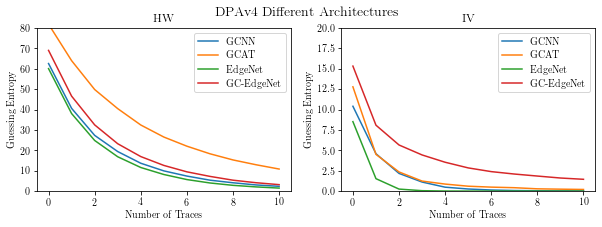

In [2]:
#Plot Baselines with different architectures
data_gcnn = np.mean(all_data['experiments\\20210112\\performance_test_GCNN']['res'], axis=0)[0:11]
data_gcat = np.mean(all_data['experiments\\20210112\\performance_test_GCAT']['res'], axis=0)[0:11]
data_edgenet = np.mean(all_data['experiments\\20210112\\performance_test_EdgeNet']['res'], axis=0)[0:11]
data_gcedgenet = np.mean(all_data['experiments\\20210112\\performance_test_gcedgenet']['res'], axis=0)[0:11]
data_gcnn_IV = np.mean(all_data['experiments\\20210115\\IV_GCNN']['res'], axis=0)[0:11]
data_gcat_IV = np.mean(all_data['experiments\\20210115\\IV_GCAT']['res'], axis=0)[0:11]
data_edgenet_IV = np.mean(all_data['experiments\\20210115\\IV_EdgeNet']['res'], axis=0)[0:11]
data_gcedgenet_IV = np.mean(all_data['experiments\\20210115\\IV_gcedgenet']['res'], axis=0)[0:11]

x = np.array([data_gcnn,data_gcat,data_edgenet,data_gcedgenet])
x_IV = np.array([data_gcnn_IV,data_gcat_IV,data_edgenet_IV,data_gcedgenet_IV])

labels = ['GCNN','GCAT','EdgeNet','GC-EdgeNet']
title='DPAv4 (HW)'
fig, axs = plt.subplots(1, 2,figsize=(10,3))
fig.suptitle('DPAv4 Different Architectures',size=14)
axs[0].set_ylim([0,80])
axs[1].set_ylim([0,20])

axs[0].set_ylabel(r'Guessing Entropy')
axs[1].set_ylabel(r'Guessing Entropy')

axs[0].set_xlabel(r'Number of Traces')
axs[1].set_xlabel(r'Number of Traces')


axs[0].set_title('HW')
axs[1].set_title('IV')

axs[0].plot(np.transpose(x))
axs[1].plot(np.transpose(x_IV))

axs[0].legend(labels)
axs[1].legend(labels)

plt.savefig("DPAv4Baseline_Clean.pdf")
#plot_traces(perf_data,plot_title,[])
#plot_traces(np.mean(perf_data,axis=0),plot_title+'(MEAN)',[])
utils.get_traces_t_print(all_data['experiments\\20210112\\performance_test_GCNN']['res'])
utils.get_traces_t_print(all_data['experiments\\20210112\\performance_test_GCAT']['res'])
utils.get_traces_t_print(all_data['experiments\\20210112\\performance_test_EdgeNet']['res'])
utils.get_traces_t_print(all_data['experiments\\20210112\\performance_test_gcedgenet']['res'])

## ASCAD Baseline 
show all architectures + show GCNN IV + HW + Conv (IV+HW)

9935.7 & 195.9 &9348.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0


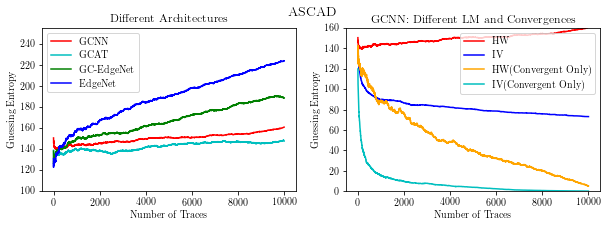

In [3]:
gcnn_data = np.append(all_data['experiments\\20210118\\ascad_gcnn']['res'],all_data['experiments\\20210202\\ascad_gcnn_1']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210202\\ascad_gcnn_2']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210202\\ascad_gcnn_3']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210202\\ascad_gcnn_4']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-1']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-2']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-3']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-4']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-5']['res'], axis=0)

gcat_data = np.append(all_data['experiments\\20210119\\ascad_gcat_10k']['res'],all_data['experiments\\20210210\\ascad_gcat']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210210\\ascad_gcat-1']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210212\\ascad_gcat-1']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210212\\ascad_gcat']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210211\\ascad_gcat']['res'],axis=0)

gcedgenet_data = np.append(all_data['experiments\\20210119\\ascad_gcedgenet_10k']['res'],all_data['experiments\\20210208\\ascad_gcedgenet']['res'], axis=0)
gcedgenet_data = np.append(gcedgenet_data,all_data['experiments\\20210212\\ascad_gcedgenet']['res'], axis=0)
gcedgenet_data = np.append(gcedgenet_data,all_data['experiments\\20210212\\ascad_gcedgenet-1']['res'], axis=0)
gcedgenet_data = np.append(gcedgenet_data,all_data['experiments\\20210211\\ascad_gcedgenet']['res'], axis=0)

edgenet_data = np.append(all_data['experiments\\20210119\\ascad_edgenet_10k']['res'],all_data['experiments\\20210211\\ascad_edgenet']['res'],axis=0)
edgenet_data = np.append(edgenet_data,all_data['experiments\\20210211\\ascad_edgenet']['res'],axis=0)
edgenet_data = np.append(edgenet_data,all_data['experiments\\20210212\\ascad_edgenet']['res'],axis=0)
edgenet_data = np.append(edgenet_data,all_data['experiments\\20210212\\ascad_edgenet-1']['res'],axis=0)

ascad_gcnn_IV = np.append(all_data['experiments\\20210119\\ascad_gcnn_IV']['res'],all_data['experiments\\20210202\\ascad_gcnn_IV_1']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210202\\ascad_gcnn_IV_2']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210202\\ascad_gcnn_IV_3']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210202\\ascad_gcnn_IV_4']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-1']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-2']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-3']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-4']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-5']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210204\\ascad_gcnn_IV']['res'], axis=0 )

(gcnn_IV_conv,p_IV) = utils.filter_traces(ascad_gcnn_IV,10)
(gcnn_conv,p) = utils.filter_traces(gcnn_data,10)
fig, axs = plt.subplots(1, 2,figsize=(10,3))
fig.suptitle('ASCAD',size=14)
axs[0].set_ylim([100,255])
axs[1].set_ylim([0,160])

axs[0].set_ylabel(r'Guessing Entropy')
axs[1].set_ylabel(r'Guessing Entropy')

axs[0].set_xlabel(r'Number of Traces')
axs[1].set_xlabel(r'Number of Traces')

axs[0].set_title('Different Architectures')
axs[1].set_title('GCNN: Different LM and Convergences')

axs[0].plot(np.transpose(np.mean(gcnn_data,axis=0)),color='r') #10k
axs[0].plot(np.transpose(np.mean(gcat_data,axis=0)),color='c') #10k
axs[0].plot(np.transpose(np.mean(gcedgenet_data,axis=0)),color='g') #10k
axs[0].plot(np.transpose(np.mean(edgenet_data,axis=0)),color='b') #10k

axs[1].plot(np.transpose(np.mean(gcnn_data,axis=0)),color='r') #10k
axs[1].plot(np.transpose(np.mean(ascad_gcnn_IV,axis=0)),color='b') #10k
axs[1].plot(np.transpose(np.mean(gcnn_conv,axis=0)),color='orange') #10k
axs[1].plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)),color='c') #10k

axs[0].legend(['GCNN','GCAT', 'GC-EdgeNet','EdgeNet'])
axs[1].legend(['HW','IV','HW(Convergent Only)','IV(Convergent Only)'])

plt.savefig("ASCAD_baseline_Clean.pdf")

###only plot gcnn
utils.get_traces_t_print(gcnn_data,threshold=10)
utils.get_traces_t_print(gcat_data,threshold=10)
utils.get_traces_t_print(gcedgenet_data,threshold=10)
utils.get_traces_t_print(edgenet_data,threshold=10)


# Secondary Findings

## DPAv4 Masked +  ASCAD Desync

498.68333333333334 & 222.84564850038143 &174.0 & 929.0
1001.0 & 0.0 &1001.0 & 1001.0
498.0769230769231 & 188.53053681992597 &252.0 & 898.0
485.4 & 269.87140147361544 &174.0 & 1001.0


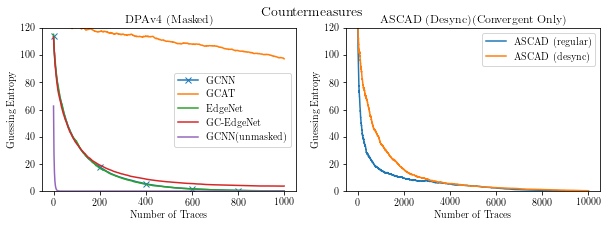

In [4]:
data_gcnn_mask = np.mean(all_data['experiments\\20210115\\masked_GCNN']['res'], axis=0)
data_gcat_mask = np.mean(all_data['experiments\\20210115\\masked_GCAT']['res'], axis=0)
data_edgenet_mask = np.mean(all_data['experiments\\20210115\\masked_EdgeNet']['res'], axis=0)
data_gcedgenet_mask = np.mean(all_data['experiments\\20210115\\masked_gcedgenet']['res'], axis=0)

ascad_desync_IV = np.append(all_data['experiments\\20210124\\ascad_desync_IV_gcnn']['res'],all_data['experiments\\20210202\\ascad_desync_IV_gcnn_1']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210202\\ascad_desync_IV_gcnn_2']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210202\\ascad_desync_IV_gcnn_3']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210202\\ascad_desync_IV_gcnn_4']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-1']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-2']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-3']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-4']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210204\\ascad_desync_IV_gcnn']['res'],axis=0)
(desync_conv,p_desync) = utils.filter_traces(ascad_desync_IV,10)

x = np.array([data_gcat_mask,data_edgenet_mask,data_gcedgenet_mask])
fig, axs = plt.subplots(1, 2,figsize=(10,3))
fig.suptitle('Countermeasures',size=14)

axs[0].set_ylim([0,120])
axs[1].set_ylim([0,120])

axs[0].set_ylabel(r'Guessing Entropy')
axs[1].set_ylabel(r'Guessing Entropy')

axs[0].set_xlabel(r'Number of Traces')
axs[1].set_xlabel(r'Number of Traces')

axs[0].set_title('DPAv4 (Masked)')
axs[1].set_title('ASCAD (Desync)(Convergent Only) ')

axs[0].plot(np.transpose(data_gcnn_mask),marker='x',markevery=200)
axs[0].plot(np.transpose(x))
axs[0].plot(np.mean(all_data['experiments\\20210112\\performance_test_GCNN']['res'], axis=0))
axs[0].legend(['GCNN','GCAT','EdgeNet','GC-EdgeNet','GCNN(unmasked)'])

axs[1].plot(np.transpose(np.mean(gcnn_IV_conv,axis=0))) #Identity
axs[1].plot(np.transpose(np.mean(desync_conv,axis=0))) #Identity
axs[1].legend(['ASCAD (regular)','ASCAD (desync)'])

plt.savefig("CounterMeasures_Clean.pdf")
#plot_traces(perf_data,plot_title,[])
#plot_traces(np.mean(perf_data,axis=0),plot_title+'(MEAN)',[])
utils.get_traces_t_print(all_data['experiments\\20210115\\masked_GCNN']['res'])
utils.get_traces_t_print(all_data['experiments\\20210115\\masked_GCAT']['res'])
utils.get_traces_t_print(all_data['experiments\\20210115\\masked_EdgeNet']['res'])
utils.get_traces_t_print(all_data['experiments\\20210115\\masked_gcedgenet']['res'])

## Placeholder

## Losses for IV Leakage Models

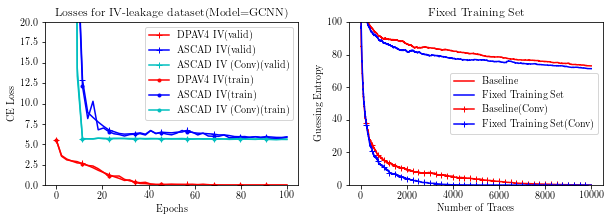

In [5]:
if (not "dpav4_gcnn_iv_td" in locals()) or( not "dpav4_gcnn_iv_td" in globals()):

    dpav4_gcnn_iv_td =utils.getTrainVarsForSetup('IV_GCNN\\')    
    ascad_iv_td = utils.getTrainVarsForSetup('ascad_gcnn_IV\\')
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-1\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-2\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-3\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-4\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-5\\'))

    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_1\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_2\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_3\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_4\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_5\\'))
    
    
dpav4_gcnn_iv_valid, dpav4_gcnn_iv_train = utils.showTrainLosses(dpav4_gcnn_iv_td)
ascad_iv_valid, ascad_iv_train = utils.showTrainLosses(ascad_iv_td)

gcnn_iv_conv_td = utils.filter_losses_mul('ascad_gcnn_IV',10,data=all_data)
ascad_gcnn_iv_conv_valid, ascad_gcnn_iv_conv_train = utils.showTrainLosses(gcnn_iv_conv_td)

gcnn_iv_fixed = np.append(all_data['experiments\\20210309\\ascad_gcnn_IV_fix-1']['res'],all_data['experiments\\20210309\\ascad_gcnn_IV_fix-2']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-3']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-4']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-5']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-6']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-7']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-8']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-9']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-10']['res'], axis=0)

(Fix_conv,p_Fix) = utils.filter_traces(gcnn_iv_fixed,10)

xvals_train = np.linspace(0,100,4500)
xvals_valid = np.linspace(0,100,45)

idx = np.arange(0,4500,100)
dpav4_gcnn_iv_train = dpav4_gcnn_iv_train[:,idx]
ascad_iv_train = ascad_iv_train[:,idx]
ascad_gcnn_iv_conv_train = ascad_gcnn_iv_conv_train[:,idx]

fig, axs = plt.subplots(1, 2,figsize=(10,3))
fig.suptitle('',size=14)

axs[0].set_ylim([0,20])
axs[1].set_ylim([0,100])

axs[0].set_ylabel(r'CE Loss')
axs[1].set_ylabel(r'Guessing Entropy')

axs[0].set_xlabel(r'Epochs')
axs[1].set_xlabel(r'Number of Traces')

axs[0].set_title('Losses for IV-leakage dataset(Model=GCNN)')
axs[1].set_title('Fixed Training Set ')



axs[0].plot(xvals_valid,np.transpose(np.mean(dpav4_gcnn_iv_valid,axis=0)),color='r',marker='+',markevery=5)
axs[0].plot(xvals_valid,np.transpose(np.mean(ascad_iv_valid,axis=0)),color='b',marker='+',markevery=5)
axs[0].plot(xvals_valid,np.transpose(np.mean(ascad_gcnn_iv_conv_valid,axis=0)),color='c',marker='+',markevery=5)

axs[0].plot(xvals_valid,np.transpose(np.mean(dpav4_gcnn_iv_train,axis=0)),color='r',marker='.',markevery=5)
axs[0].plot(xvals_valid,np.transpose(np.mean(ascad_iv_train,axis=0)),color='b',marker='.',markevery=5)
axs[0].plot(xvals_valid,np.transpose(np.mean(ascad_gcnn_iv_conv_train,axis=0)),color='c',marker='.',markevery=5)

axs[0].legend(['DPAV4 IV(valid)','ASCAD IV(valid)','ASCAD IV (Conv)(valid)','DPAV4 IV(train)','ASCAD IV(train)','ASCAD IV (Conv)(train)'])
axs[1].plot(np.transpose(np.mean(ascad_gcnn_IV,axis=0)),color='r')
axs[1].plot(np.transpose(np.mean(gcnn_iv_fixed,axis=0)),color='b')

axs[1].plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)),color='r',marker='+',markevery=250)
axs[1].plot(np.transpose(np.mean(Fix_conv,axis=0)),color='b',marker='+',markevery=250)
axs[1].legend(['Baseline','Fixed Training Set','Baseline(Conv)','Fixed Training Set(Conv)'])


plt.savefig("losses_IV_fixed_train_clean.pdf")




## Fixed Trainingset

# Ablation Study

## Ablation Study DPAv4

14.0 & 2.0976176963403033 &12.0 & 18.0
16.8 & 4.214261501141095 &11.0 & 25.0
921.5 & 132.03351847163657 &634.0 & 1001.0
14.3 & 2.8301943396169813 &11.0 & 21.0
22.8 & 3.8418745424597094 &18.0 & 30.0


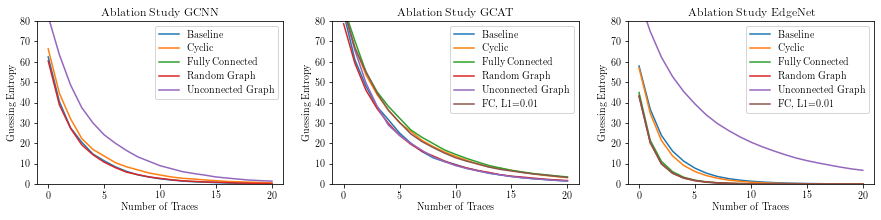

In [6]:
abl_gcnn_data = all_data['experiments\\20210125\\ablation_study_GCNN']['res']
(n,m) = abl_gcnn_data.shape
abl_gcnn_srt_data = np.reshape(abl_gcnn_data,(5,10,m))
abl_gcnn_data_mean = np.mean(abl_gcnn_srt_data, axis = 1 )

data_abl_gcat1 = all_data['experiments\\20210113\\ablation_study_GCAT']['res']
data_abl_gcat2 = all_data['experiments\\20210113\\ablation_study_GCAT-2']['res']
data_abl_gcat3 = all_data['experiments\\20210113\\ablation_study_GCAT-3']['res']
data_abl_gcat4 = all_data['experiments\\20210113\\ablation_study_GCAT-4']['res']
data_abl_gcat5 = all_data['experiments\\20210113\\ablation_study_GCAT-5']['res']
data_abl_gcat6 = all_data['experiments\\20210113\\ablation_study_GCAT-6']['res']

abl_gcat_data = np.append(data_abl_gcat1,data_abl_gcat2, axis=0)
abl_gcat_data = np.append(abl_gcat_data,data_abl_gcat3, axis=0)
abl_gcat_data = np.append(abl_gcat_data,data_abl_gcat4, axis=0)
abl_gcat_data = np.append(abl_gcat_data,data_abl_gcat5, axis=0)
abl_gcat_data = np.append(abl_gcat_data,data_abl_gcat6, axis=0)

(n,m) = abl_gcat_data.shape
srt_abl_gcat_data = np.reshape(abl_gcat_data,(6,10,m))
abl_gcat_data_mean = np.mean(srt_abl_gcat_data, axis = 1 )

data_abl_edgenet1 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet_1']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_2']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_3']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_4']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_5']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_6']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_7']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_8']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_9']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_10']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_11']['res'],axis=0)
data_abl_edgenet1 = np.append(data_abl_edgenet1, all_data['experiments\\20210224\\ablation_study_EdgeNet_12']['res'],axis=0)

data_abl_edgenet2 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet-2']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet-2_1']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_2']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_3']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_4']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_5']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_6']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_7']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_8']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_9']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_10']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_11']['res'],axis=0)
data_abl_edgenet2 = np.append(data_abl_edgenet2, all_data['experiments\\20210224\\ablation_study_EdgeNet-2_12']['res'],axis=0)

data_abl_edgenet3 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet-2']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet-3_1']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_2']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_3']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_4']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_5']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_6']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_7']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_8']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_9']['res'],axis=0)
data_abl_edgenet3 = np.append(data_abl_edgenet3, all_data['experiments\\20210224\\ablation_study_EdgeNet-3_10']['res'],axis=0)

data_abl_edgenet4 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet-2']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet-4_1']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_2']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_3']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_4']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_5']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_6']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_7']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_8']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_9']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_10']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_11']['res'],axis=0)
data_abl_edgenet4 = np.append(data_abl_edgenet4, all_data['experiments\\20210224\\ablation_study_EdgeNet-4_12']['res'],axis=0)

data_abl_edgenet5 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet-2']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet-5_1']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_2']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_3']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_4']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_5']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_6']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_7']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_8']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_9']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_10']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_11']['res'],axis=0)
data_abl_edgenet5 = np.append(data_abl_edgenet5, all_data['experiments\\20210224\\ablation_study_EdgeNet-5_12']['res'],axis=0)

data_abl_edgenet6 = np.append(all_data['experiments\\20210113\\ablation_study_EdgeNet-2']['res'], all_data['experiments\\20210224\\ablation_study_EdgeNet-6_1']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_2']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_3']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_4']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_5']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_6']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_7']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_8']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_9']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_10']['res'],axis=0)
data_abl_edgenet6 = np.append(data_abl_edgenet6, all_data['experiments\\20210224\\ablation_study_EdgeNet-6_11']['res'],axis=0)


data_abl_edgenet = np.array([np.mean(data_abl_edgenet1,axis=0),np.mean(data_abl_edgenet2,axis=0),np.mean(data_abl_edgenet3,axis=0),np.mean(data_abl_edgenet4,axis=0),np.mean(data_abl_edgenet5,axis=0),np.mean(data_abl_edgenet6,axis=0)])

fig, axs = plt.subplots(1, 3,figsize=(15,3))
fig.suptitle('',size=14)

axs[0].set_ylim([0,80])
axs[1].set_ylim([0,80])
axs[2].set_ylim([0,80])

axs[0].set_ylabel(r'Guessing Entropy')
axs[1].set_ylabel(r'Guessing Entropy')
axs[2].set_ylabel(r'Guessing Entropy')

axs[0].set_xlabel(r'Number of Traces')
axs[1].set_xlabel(r'Number of Traces')
axs[2].set_xlabel(r'Number of Traces')

axs[0].set_title('Ablation Study GCNN')
axs[1].set_title('Ablation Study GCAT ')
axs[2].set_title('Ablation Study EdgeNet ')

axs[0].plot(np.transpose(abl_gcnn_data_mean[:,0:21]))
axs[1].plot(np.transpose(abl_gcat_data_mean[:,0:21]))
axs[2].plot(np.transpose(data_abl_edgenet[:,0:21]))

axs[0].legend(['Baseline','Cyclic','Fully Connected','Random Graph','Unconnected Graph'])
axs[1].legend(['Baseline','Cyclic','Fully Connected','Random Graph','Unconnected Graph', 'FC, L1=0.01'])
axs[2].legend(['Baseline','Cyclic','Fully Connected','Random Graph','Unconnected Graph', 'FC, L1=0.01'])

plt.savefig("DPAv4_Abl_Clean.pdf")


utils.get_traces_t_print(abl_gcnn_srt_data[0,:,:])
utils.get_traces_t_print(abl_gcnn_srt_data[1,:,:])
utils.get_traces_t_print(abl_gcnn_srt_data[2,:,:])
utils.get_traces_t_print(abl_gcnn_srt_data[3,:,:])
utils.get_traces_t_print(abl_gcnn_srt_data[4,:,:])


## Ablation Study ASCAD

45.45454545454545
25.0
0.0
100.0
9.090909090909092
1599.0 & 2294.283068847434 &242.0 & 6157.0
4843.666666666667 & 1798.152817631348 &2369.0 & 6588.0
993.4 & 301.56200025865326 &594.0 & 1646.0
1708.0 & 0.0 &1708.0 & 1708.0


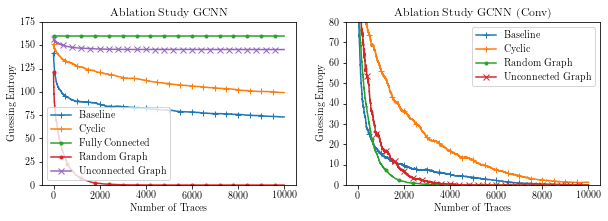

In [7]:
ascad_IV_rnd = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_rnd']['res'],all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_1']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_2']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_3']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_4']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-1']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-2']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-3']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-4']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210204\\ascad_gcnn_IV_rnd']['res'], axis=0) 

(gcnn_IV_rnd_conv,p_IV_rnd) = utils.filter_traces(ascad_IV_rnd,10)



ascad_IV_fc = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_fc']['res'],all_data['experiments\\20210205\\ascad_gcnn_IV_fc-1']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-2']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-3']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-4']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-5']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210206\\ascad_gcnn_IV_fc-1']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210206\\ascad_gcnn_IV_fc-2']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210206\\ascad_gcnn_IV_fc-3']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210208\\ascad_gcnn_IV_fc']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210208\\ascad_gcnn_IV_fc-1']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210208\\ascad_gcnn_IV_fc-2']['res'], axis=0) 

(gcnn_IV_fc_conv,p_IV_fc) = utils.filter_traces(ascad_IV_fc,10)


ascad_IV_id = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_ID']['res'],all_data['experiments\\20210205\\ascad_gcnn_IV_ID-1']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-2']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-3']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-4']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-5']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-1']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-2']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-3']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-4']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210208\\ascad_gcnn_IV_ID']['res'], axis=0) 

(gcnn_IV_id_conv,p_IV_id) = utils.filter_traces(ascad_IV_id,10)


ascad_IV_line = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_line']['res'],all_data['experiments\\20210205\\ascad_gcnn_IV_line-1']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-2']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-3']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-4']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-5']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-2']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-3']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-4']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-5']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210208\\ascad_gcnn_IV_line']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210208\\ascad_gcnn_IV_line-1']['res'], axis=0) 
(gcnn_IV_line_conv,p_IV_line) = utils.filter_traces(ascad_IV_line,10)


fig, axs = plt.subplots(1, 2,figsize=(10,3))
fig.suptitle('',size=14)

axs[0].set_ylim([0,175])
axs[1].set_ylim([0,80])

axs[0].set_ylabel(r'Guessing Entropy')
axs[1].set_ylabel(r'Guessing Entropy')

axs[0].set_xlabel(r'Number of Traces')
axs[1].set_xlabel(r'Number of Traces')

axs[0].set_title('Ablation Study GCNN')
axs[1].set_title('Ablation Study GCNN (Conv) ')

axs[0].plot(np.transpose(np.mean(ascad_gcnn_IV,axis=0)),marker='+',markevery=500) #IV
axs[0].plot(np.transpose(np.mean(ascad_IV_line,axis=0)),marker='+',markevery=500) #Cyclic Graph
axs[0].plot(np.transpose(np.mean(ascad_IV_fc,axis=0)),marker='.',markevery=600) #Fully Connected
axs[0].plot(np.transpose(np.mean(ascad_IV_rnd,axis=0)),marker='.',markevery=600) #Random
axs[0].plot(np.transpose(np.mean(ascad_IV_id,axis=0)),marker='x',markevery=400) #Identity


#plt.plot(np.transpose(all_data['experiments\\20210119\\ascad_gcnn_IV']['res']),marker='+',markevery=500) #Baseline
axs[1].plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)),marker='+',markevery=500) #IV
axs[1].plot(np.transpose(np.mean(gcnn_IV_line_conv,axis=0)),marker='+',markevery=500) #Cyclic Graph
#plt.plot(np.transpose(np.mean(ascad_IV_fc,axis=0)),marker='.',markevery=600) #Fully Connected
axs[1].plot(np.transpose(np.mean(gcnn_IV_rnd_conv,axis=0)),marker='.',markevery=600) #Random
axs[1].plot(np.transpose(np.mean(gcnn_IV_id_conv,axis=0)),marker='x',markevery=400) #Identity

axs[0].legend(['Baseline','Cyclic','Fully Connected','Random Graph','Unconnected Graph'])
axs[1].legend(['Baseline','Cyclic','Random Graph','Unconnected Graph'])



print (p_IV)
print (p_IV_line)
print (p_IV_fc)
print (p_IV_rnd)
print (p_IV_id)

plt.savefig("ASCAD_ablation_clean.pdf")
utils.get_traces_t_print(gcnn_IV_conv,threshold=10)
utils.get_traces_t_print(gcnn_IV_line_conv,threshold=10)
utils.get_traces_t_print(gcnn_IV_rnd_conv,threshold=10)
utils.get_traces_t_print(gcnn_IV_id_conv,threshold=10)


### Losses Ablation Study

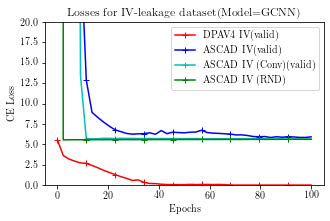

In [8]:
if (not "ascad_iv_rnd_td" in locals()) or( not "ascad_iv_rnd_td" in globals()):


    ascad_iv_rnd_td = utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd\\')

    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-1\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-2\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-3\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-4\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-5\\'))

    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_1\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_2\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_3\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_4\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_5\\'))
    
ascad_iv_rnd_valid, ascad_iv_rnd_train = utils.showTrainLosses(ascad_iv_rnd_td)

ascad_iv_rnd_train = ascad_iv_rnd_train[:,idx]
fig, axs = plt.subplots(1, 1,figsize=(5,3))

axs.set_ylim([0,20])

axs.set_ylabel(r'CE Loss')

axs.set_xlabel(r'Epochs')

axs.set_title('Losses for IV-leakage dataset(Model=GCNN)')

axs.plot(xvals_valid,np.transpose(np.mean(dpav4_gcnn_iv_valid,axis=0)),color='r',marker='+',markevery=5)
axs.plot(xvals_valid,np.transpose(np.mean(ascad_iv_valid,axis=0)),color='b',marker='+',markevery=5)
axs.plot(xvals_valid,np.transpose(np.mean(ascad_gcnn_iv_conv_valid,axis=0)),color='c',marker='+',markevery=5)


axs.plot(xvals_valid,np.transpose(np.mean(ascad_iv_rnd_valid,axis=0)),color='g',marker='+',markevery=5)
axs.legend(['DPAV4 IV(valid)','ASCAD IV(valid)','ASCAD IV (Conv)(valid)','ASCAD IV (RND)'])

plt.savefig("ASCAD_ablation_losses_clean.pdf")


## Adjacency Matrices

A_dpa4_50_Random_5.npy
A_dpa4_50_Fully Connected_5.npy
A_dpa4_50_Identity_5.npy
A_dpa4_50_Successive_5.npy


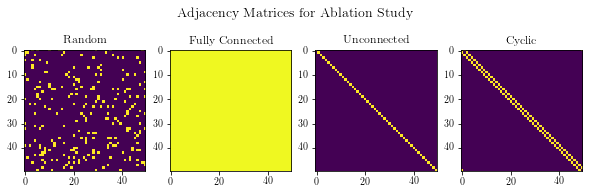

In [9]:
dataset = 'dpa4'
nFeatures = 50
threshold = 5
(traces,_,_,_)= import_traces.import_traces(False, dataset,False, 10000) 

(A_rnd,_) =gg.get_graph(dataset,nFeatures,"Random",threshold,traces)
(A_fc,_) =gg.get_graph(dataset,nFeatures,"Fully Connected",threshold,traces)
(A_id,_) =gg.get_graph(dataset,nFeatures,"Identity",threshold,traces)
(A_cyc,_) =gg.get_graph(dataset,nFeatures,"Successive",threshold,traces)



fig, axs = plt.subplots(1, 4,figsize=(10,3))
fig.suptitle('Adjacency Matrices for Ablation Study', fontsize=14)
axs[0].set_title("Random")
axs[1].set_title("Fully Connected")
axs[2].set_title("Unconnected")
axs[3].set_title("Cyclic")

#axs[4].set_title("E=100")

axs[0].imshow(A_rnd, interpolation="none")
axs[1].imshow(A_fc, cmap=plt.get_cmap('plasma_r'))
axs[2].imshow(A_id, interpolation="none")
axs[3].imshow(A_cyc, interpolation="none")

plt.savefig("DPAvSquareAbl_clean.pdf")

# Hyperparameter Analysis

## HP Analysis dpav4 F + N_e

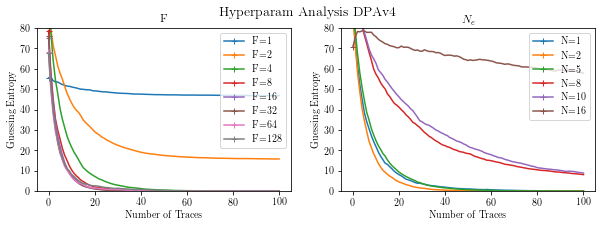

In [10]:
data_F = all_data['experiments\\20210118\\performance_test_GCNN_F']
CE_data_F = data_F['res']
(n, m) = CE_data_F.shape
CE_data_F = np.pad(CE_data_F,[(0,3),(0,0)],mode='constant',constant_values=np.nan)

CE_srt_F = np.reshape(CE_data_F,(8,10,m))
CE_mean_F = np.nanmean(CE_srt_F, axis = 1 )[:,0:101]


data_N = all_data['experiments\\20210118\\performance_test_GCNN_N']
CE_data_N = data_N['res']
(n, m) = CE_data_N.shape

CE_srt_N = np.reshape(CE_data_N,(6,10,m))
CE_mean_N = np.nanmean(CE_srt_N, axis = 1 )[:,0:101]


fig, axs = plt.subplots(1, 2,figsize=(10,3))
fig.suptitle('Hyperparam Analysis DPAv4',size=14)

axs[0].set_ylim([0,80])
axs[1].set_ylim([0,80])

axs[0].set_ylabel(r'Guessing Entropy')
axs[1].set_ylabel(r'Guessing Entropy')

axs[0].set_xlabel(r'Number of Traces')
axs[1].set_xlabel(r'Number of Traces')

axs[0].set_title(' F')
axs[1].set_title('$N_e$ ')

axs[0].plot(np.transpose(CE_mean_F),marker='+',markevery=500) 
axs[1].plot(np.transpose(CE_mean_N),marker='+',markevery=500) 

axs[0].legend(['F=1','F=2','F=4','F=8','F=16','F=32','F=64','F=128','F=256'])
axs[1].legend(['N=1','N=2','N=5','N=8','N=10','N=16'])

#IV
plt.savefig("DPAv4_HP-Tuning-NF_clean.pdf")



## HP Analysis LR ASCAD

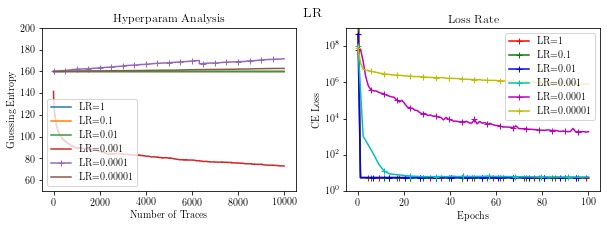

In [11]:
if (not "LRe0_IV_td" in locals()) or( not "LRe0_IV_td" in globals()):

    LRe0_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_LRe0')    
    LRe1_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_LRe-1')    
    LRe2_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_LRe-2')   
    LRe3_IV_td = ascad_iv_td
    LRe4_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_LRe-4')    
    LRe5_IV_td =utils.getTrainVarsForSetup('ascad_gcnn_IV_LRe-5')   

LRe0 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_LRe0-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_LRe0-2']['res'],axis=0)
LRe0 = np.append(LRe0,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe0-3']['res'],axis=0)
LRe0 = np.append(LRe0,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe0-4']['res'],axis=0)
LRe0 = np.append(LRe0,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe0-5']['res'],axis=0)

LRe1 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-1-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-1-2']['res'],axis=0)
LRe1 = np.append(LRe1,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-1-3']['res'],axis=0)
LRe1 = np.append(LRe1,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-1-4']['res'],axis=0)
LRe1 = np.append(LRe1,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-1-5']['res'],axis=0)

LRe2 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-2-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-2-2']['res'],axis=0)
LRe2 = np.append(LRe2,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-2-3']['res'],axis=0)
LRe2 = np.append(LRe2,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-2-4']['res'],axis=0)
LRe2 = np.append(LRe2,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-2-5']['res'],axis=0)

LRe4 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-2']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-3']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-4']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-5']['res'],axis=0)
LRe4 = np.append(LRe4,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-4-6']['res'],axis=0)

LRe5 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-2']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-3']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-4']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-5']['res'],axis=0)
LRe5 = np.append(LRe5,all_data['experiments\\20210222\\ascad_gcnn_IV_LRe-5-6']['res'],axis=0)

labels = ['LR=1','LR=0.1','LR=0.01','LR=0.001','LR=0.0001','LR=0.00001']

LRe0_valid, LRe0_train = utils.showTrainLosses(LRe0_IV_td)
LRe1_valid, LRe1_train = utils.showTrainLosses(LRe1_IV_td)
LRe2_valid, LRe2_train = utils.showTrainLosses(LRe2_IV_td)
LRe3_valid, LRe3_train = utils.showTrainLosses(LRe3_IV_td)
LRe4_valid, LRe4_train = utils.showTrainLosses(LRe4_IV_td)
LRe5_valid, LRe5_train = utils.showTrainLosses(LRe5_IV_td)

idx = np.arange(0,4500,100)
xvals_valid = np.linspace(0,100,90)

LRe0_train = LRe0_train[:,idx]
LRe1_train = LRe1_train[:,idx]
LRe2_train = LRe2_train[:,idx]
LRe3_train = LRe3_train[:,idx]
LRe4_train = LRe4_train[:,idx]
LRe5_train = LRe5_train[:,idx]

fig, axs = plt.subplots(1, 2,figsize=(10,3))
fig.suptitle('LR',size=14)

axs[1].set_yscale('log')
axs[0].set_ylim([50,200])
axs[1].set_ylim([1,math.pow(10,9)])

axs[0].set_ylabel(r'Guessing Entropy')
axs[1].set_ylabel(r'CE Loss')

axs[0].set_xlabel(r'Number of Traces')
axs[1].set_xlabel(r'Epochs')

axs[0].set_title('Hyperparam Analysis')
axs[1].set_title('Loss Rate')

axs[0].plot(np.transpose(np.mean(LRe0,axis=0)))
axs[0].plot(np.transpose(np.mean(LRe1,axis=0)))
axs[0].plot(np.transpose(np.mean(LRe2,axis=0)))
axs[0].plot(np.transpose(np.mean(ascad_gcnn_IV,axis=0))) 
axs[0].plot(np.transpose(np.mean(LRe4,axis=0)),marker='+',markevery=500)
axs[0].plot(np.transpose(np.mean(LRe5,axis=0)))

axs[1].plot(xvals_valid,np.transpose(np.mean(LRe0_valid,axis=0)),color='r',marker='+',markevery=4)
axs[1].plot(xvals_valid,np.transpose(np.mean(LRe1_valid,axis=0)),color='g',marker='+',markevery=5)
axs[1].plot(xvals_valid,np.transpose(np.mean(LRe2_valid,axis=0)),color='b',marker='+',markevery=6)
axs[1].plot(np.linspace(0,100,45),np.transpose(np.mean(LRe3_valid,axis=0)),color='c',marker='+',markevery=5)
axs[1].plot(xvals_valid,np.transpose(np.mean(LRe4_valid,axis=0)),color='m',marker='+',markevery=5)
axs[1].plot(xvals_valid,np.transpose(np.mean(LRe5_valid,axis=0)),color='y',marker='+',markevery=5)

axs[0].legend(labels)
axs[1].legend(labels)

plt.savefig("ascad_iv_LR_clean.pdf")

## HP Analyis N_E ASCAD

45.45454545454545
33.33333333333333
16.666666666666664
40.0
2569.4 & 3299.8915497331122 &509.0 & 9080.0
1168.25 & 1065.1080637663017 &458.0 & 3004.0
582.0 & 41.0 &541.0 & 623.0
552.25 & 71.66022257849887 &482.0 & 670.0


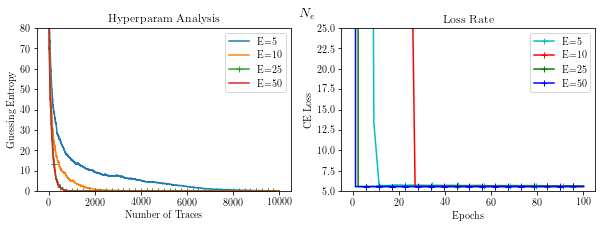

In [12]:
ascadn10 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N10-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_N10-2']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-1']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-2']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-3']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-4']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-5']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-6']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-7']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-8']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-9']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-10']['res'],axis=0)

ascadn25 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N25-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_N25-2']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-1']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-2']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-3']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-4']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-5']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-6']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-7']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-8']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-9']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-10']['res'],axis=0)

ascadn50 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N50-1']['res'],all_data['experiments\\20210223\\ascad_gcnn_IV_N50-1']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-2']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-3']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-4']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-5']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-6']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-7']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-8']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-9']['res'],axis=0)

ascadn100 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N100-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_N100-2']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-3']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-4']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-5']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-6']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-1']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-2']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-3']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-4']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-5']['res'],axis=0)

(knn10_conv,p_n10) = utils.filter_traces(ascadn10,10)
(knn25_conv,p_n25) = utils.filter_traces(ascadn25,10)
(knn50_conv,p_n50) = utils.filter_traces(ascadn50,10)
(knn100_conv,p_n100) = utils.filter_traces(ascadn100,10)


nn5_IV_td = utils.filter_losses_mul('ascad_gcnn_IV',10,data=all_data)
nn10_IV_td  = utils.filter_losses_mul('ascad_gcnn_IV_N10',10,data=all_data)
nn25_IV_td  = utils.filter_losses_mul('ascad_gcnn_IV_N25',10,data=all_data)
nn50_IV_td  = utils.filter_losses_mul('ascad_gcnn_IV_N50',10,data=all_data)

nn5_valid, nn5_train = utils.showTrainLosses(nn5_IV_td)
nn10_valid, nn10_train = utils.showTrainLosses(nn10_IV_td)
nn25_valid, nn25_train = utils.showTrainLosses(nn25_IV_td)
nn50_valid, nn50_train = utils.showTrainLosses(nn50_IV_td)

idx = np.arange(0,4500,100)
xvals_train = np.linspace(0,100,4500)
xvals_valid = np.linspace(0,100,90)

nn5_train = nn5_train[:,idx]
nn10_train = nn10_train[:,idx]
nn25_train = nn25_train[:,idx]
nn50_train = nn50_train[:,idx]

fig, axs = plt.subplots(1, 2,figsize=(10,3))
fig.suptitle('$N_e$',size=14)

#axs[1].set_yscale('log')
axs[0].set_ylim([0,80])
axs[1].set_ylim([5,25])

axs[0].set_ylabel(r'Guessing Entropy')
axs[1].set_ylabel(r'CE Loss')

axs[0].set_xlabel(r'Number of Traces')
axs[1].set_xlabel(r'Epochs')

axs[0].set_title('Hyperparam Analysis')
axs[1].set_title('Loss Rate')

labels = ['E=5','E=10','E=25','E=50','E=100']

axs[0].plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)))
axs[0].plot(np.transpose(np.mean(knn10_conv,axis=0)))
axs[0].plot(np.transpose(np.mean(knn25_conv,axis=0)),marker='+',markevery=250)
axs[0].plot(np.transpose(np.mean(knn50_conv,axis=0)))
axs[0].legend(labels)

axs[1].plot(np.linspace(0,100,45),np.transpose(np.mean(nn5_valid,axis=0)),color='c',marker='+',markevery=5)
axs[1].plot(xvals_valid,np.transpose(np.mean(nn10_valid,axis=0)),color='r',marker='+',markevery=5)
axs[1].plot(xvals_valid,np.transpose(np.mean(nn25_valid,axis=0)),color='g',marker='+',markevery=5)
axs[1].plot(xvals_valid,np.transpose(np.mean(nn50_valid,axis=0)),color='b',marker='+',markevery=5)
axs[1].legend(labels)
                 
plt.savefig("ascad_iv_nedges_clean.pdf")
print(p_IV)
print(p_n10)
print(p_n25)
print(p_n50)


utils.get_traces_t_print(gcnn_IV_conv,threshold=1)
utils.get_traces_t_print(knn10_conv,threshold=1)
utils.get_traces_t_print(knn25_conv,threshold=1)
utils.get_traces_t_print(knn50_conv,threshold=1)

## HP Analysis ASCAD L+F

C:\Users\vasco\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\vasco\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


45.45454545454545
0.0
12.5
30.0
40.0
1599.0 & 2294.283068847434 &242.0 & 6157.0
10001.0 & 0.0 &10001.0 & 10001.0
289.0 & 0.0 &289.0 & 289.0
361.3333333333333 & 62.43040569750893 &300.0 & 447.0
1067.0 & 794.5888874128558 &284.0 & 2125.0


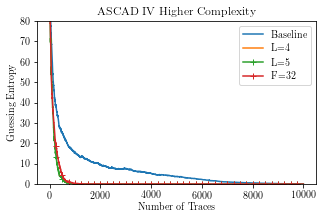

In [13]:
gcnn_iv_L = np.append(all_data['experiments\\20210303\\ascad_gcnn_IV_L-1']['res'],all_data['experiments\\20210303\\ascad_gcnn_IV_L-2']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-3']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-4']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-5']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-6']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-7']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-8']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-9']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-10']['res'], axis=0)

gcnn_iv_LL = np.append(all_data['experiments\\20210303\\ascad_gcnn_IV_LL-1']['res'],all_data['experiments\\20210303\\ascad_gcnn_IV_LL-2']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-3']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-4']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-5']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-8']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-9']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-10']['res'], axis=0)

gcnn_iv_F = np.append(all_data['experiments\\20210305\\ascad_gcnn_IV_F-1']['res'],all_data['experiments\\20210305\\ascad_gcnn_IV_F-2']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-3']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-4']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-5']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-6']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-7']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-8']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-9']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-10']['res'], axis=0)



(L_conv,p_L) = utils.filter_traces(gcnn_iv_L,10)
(LL_conv,p_LL) = utils.filter_traces(gcnn_iv_LL,10)
(F_conv,p_F) = utils.filter_traces(gcnn_iv_F,10)

fig, axs = plt.subplots(1, 1,figsize=(5,3))
axs.set_ylim([0,80])

axs.set_ylabel(r'Guessing Entropy')

axs.set_xlabel(r'Number of Traces')


axs.set_title('ASCAD IV Higher Complexity')

labels = ['Baseline','L=4','L=5','F=32']
axs.plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)))
axs.plot(np.transpose(np.mean(L_conv,axis=0)))
axs.plot(np.transpose(np.mean(LL_conv,axis=0)),marker='+',markevery=250)
axs.plot(np.transpose(np.mean(F_conv,axis=0)),marker='+',markevery=250)


axs.legend(labels)

plt.savefig("ascad_iv_LF_conv_clean.pdf")
print(p_IV)
print(p_L)
print(p_LL)
print(p_F)
print(p_Fix)

utils.get_traces_t_print(gcnn_IV_conv,threshold=10)
utils.get_traces_t_print(gcnn_iv_L,threshold=10)
utils.get_traces_t_print(LL_conv,threshold=10)
utils.get_traces_t_print(F_conv,threshold=10)
utils.get_traces_t_print(Fix_conv,threshold=10)